<a href="https://colab.research.google.com/github/alexsgith/Alcohol_Studies/blob/main/Alcohol_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Alcohol_Studies
#Team: Alex Savi(21MCAA03) & Steffie Sabu(21MCAA32)

In [39]:
#0. Read Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno #For missing value visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
data = pd.read_csv("Alcohol_Studies.csv")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [40]:
#1. PreProcessing or Data Cleaning - Diamentionality Reduction
to_drop = ['famsize','nursery','higher', 'internet', 'romantic','traveltime','reason']
data.drop(to_drop, inplace=True, axis=1)
print(data)

    school sex  age address Pstatus  Medu  Fedu      Mjob      Fjob guardian  \
0       GP   F   18       U       A     4     4   at_home   teacher   mother   
1       GP   F   17       U       T     1     1   at_home     other   father   
2       GP   F   15       U       T     1     1   at_home     other   mother   
3       GP   F   15       U       T     4     2    health  services   mother   
4       GP   F   16       U       T     3     3     other     other   father   
..     ...  ..  ...     ...     ...   ...   ...       ...       ...      ...   
644     MS   F   19       R       T     2     3  services     other   mother   
645     MS   F   18       U       T     3     1   teacher  services   mother   
646     MS   F   18       U       T     1     1     other     other   mother   
647     MS   M   17       U       T     3     1  services  services   mother   
648     MS   M   18       R       T     3     2  services     other   mother   

     ...  famrel  freetime goout Dalc W

In [41]:
for marks in range(min(data['G3']),max(data['G3'])):
    count = sum([value>marks for value in data['G3']])
    print(f'{marks} ----> {(count*100)/len(data)}')
  
temp = ['Above Average' if value>10 else 'Below Average' for value in data['G3']]
data['GM'] = temp
data['GM']


0 ----> 97.68875192604006
1 ----> 97.5346687211094
2 ----> 97.5346687211094
3 ----> 97.5346687211094
4 ----> 97.5346687211094
5 ----> 97.38058551617874
6 ----> 96.91833590138675
7 ----> 95.37750385208012
8 ----> 89.98459167950693
9 ----> 84.59167950693374
10 ----> 69.64560862865947
11 ----> 53.62095531587057
12 ----> 42.526964560862865
13 ----> 29.892141756548536
14 ----> 20.184899845916796
15 ----> 12.63482280431433
16 ----> 7.0878274268104775
17 ----> 2.6194144838212634
18 ----> 0.3081664098613251


0      Above Average
1      Above Average
2      Above Average
3      Above Average
4      Above Average
           ...      
644    Below Average
645    Above Average
646    Below Average
647    Below Average
648    Above Average
Name: GM, Length: 649, dtype: object

In [42]:
LabelEnc = LabelEncoder()
categorical_features = data.select_dtypes(include = ['object']).columns
for Feature in categorical_features:
    data[Feature] = LabelEnc.fit_transform(data[Feature])
data

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GM
0,0,0,18,1,0,4,4,0,4,1,...,3,4,1,1,3,4,0,11,11,0
1,0,0,17,1,1,1,1,0,2,0,...,3,3,1,1,3,2,9,11,11,0
2,0,0,15,1,1,1,1,0,2,1,...,3,2,2,3,3,6,12,13,12,0
3,0,0,15,1,1,4,2,1,3,1,...,2,2,1,1,5,0,14,14,14,0
4,0,0,16,1,1,3,3,2,2,0,...,3,2,1,2,5,0,11,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,2,3,3,2,1,...,4,2,1,2,5,4,10,11,10,1
645,1,0,18,1,1,3,1,4,3,1,...,3,4,1,1,1,4,15,15,16,0
646,1,0,18,1,1,1,1,2,2,1,...,1,1,1,1,5,6,11,12,9,1
647,1,1,17,1,1,3,1,3,3,1,...,4,5,3,4,2,6,10,10,10,1


In [43]:
feature_cols=['age','Medu','Fedu','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
x=data[feature_cols] 
y=data['GM'] #target variable
print(x)
print(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


     age  Medu  Fedu  studytime  failures  famrel  freetime  goout  Dalc  \
0     18     4     4          2         0       4         3      4     1   
1     17     1     1          2         0       5         3      3     1   
2     15     1     1          2         0       4         3      2     2   
3     15     4     2          3         0       3         2      2     1   
4     16     3     3          2         0       4         3      2     1   
..   ...   ...   ...        ...       ...     ...       ...    ...   ...   
644   19     2     3          3         1       5         4      2     1   
645   18     3     1          2         0       4         3      4     1   
646   18     1     1          2         0       1         1      1     1   
647   17     3     1          1         0       2         4      5     3   
648   18     3     2          1         0       4         4      1     3   

     Walc  health  absences  
0       1       3         4  
1       1       3         2

In [44]:

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf= clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)*100
pre=metrics.precision_score(y_test,y_pred)*100
rec=metrics.recall_score(y_test,y_pred)*100
f1=metrics.f1_score(y_test,y_pred)*100
print("Accuracy: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1: ",f1)


Accuracy:  73.84615384615385
Precision:  100.0
Recall:  26.08695652173913
F1:  41.37931034482759


[Text(0.5, 0.8333333333333334, 'X[4] <= 0.5\nentropy = 0.879\nsamples = 584\nvalue = [410, 174]'),
 Text(0.25, 0.5, 'X[3] <= 1.5\nentropy = 0.726\nsamples = 490\nvalue = [391, 99]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.873\nsamples = 150\nvalue = [106, 44]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.639\nsamples = 340\nvalue = [285, 55]'),
 Text(0.75, 0.5, 'X[1] <= 3.5\nentropy = 0.726\nsamples = 94\nvalue = [19, 75]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.637\nsamples = 87\nvalue = [14, 73]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]')]

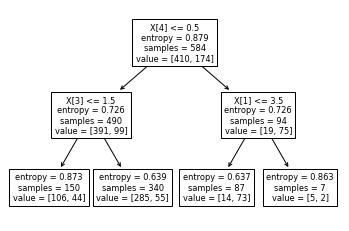

In [45]:
#visialize the model (Tree)
from sklearn import tree
tree.plot_tree(clf)

In [46]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100)

clf= clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)*100
pre=metrics.precision_score(y_test,y_pred)*100
rec=metrics.recall_score(y_test,y_pred)*100
f1=metrics.f1_score(y_test,y_pred)*100

print("Accuracy: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1: ",f1)


Accuracy:  75.38461538461539
Precision:  88.88888888888889
Recall:  34.78260869565217
F1:  50.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [47]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf= clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)*100
pre=metrics.precision_score(y_test,y_pred)*100
rec=metrics.recall_score(y_test,y_pred)*100
f1=metrics.f1_score(y_test,y_pred)*100

print("Accuracy: ",acc)
print("Precision: ",pre)
print("Recall: ",rec)
print("F1: ",f1)


Accuracy:  70.76923076923077
Precision:  66.66666666666666
Recall:  34.78260869565217
F1:  45.71428571428571


Text(0, 0.5, 'Grade')

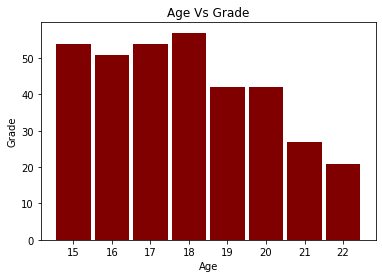

In [48]:
plt.bar(data.age, (data.G1+data.G1+data.G1) , color ='maroon',width = 0.9)
plt.title("Age Vs Grade")
plt.xlabel("Age")
plt.ylabel("Grade")

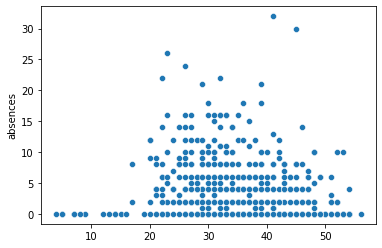

In [49]:
import seaborn as sns
sns.scatterplot(x=(data["G1"]+data["G2"]+data["G3"]), y=data["absences"])

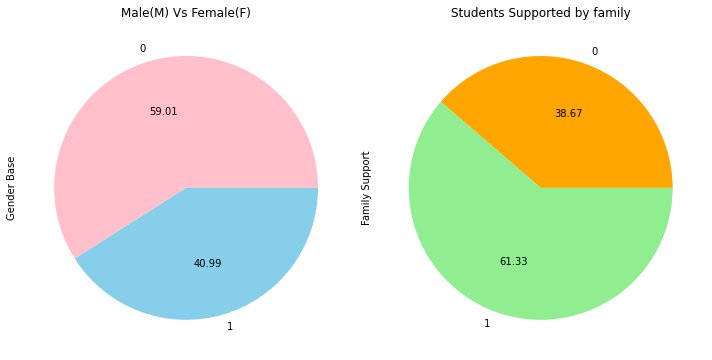

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
data.groupby('sex').size().plot(kind='pie', autopct='%.2f',colors=['pink', 'skyblue'],ax=ax1)
data.groupby('famsup').size().plot(kind='pie', autopct='%.2f',colors=['orange', 'lightgreen'],ax=ax2)
ax1.set_ylabel('Gender Base')
ax1.set_title('Male(M) Vs Female(F)')
ax2.set_ylabel('Family Support')
ax2.set_title('Students Supported by family')
plt.tight_layout()

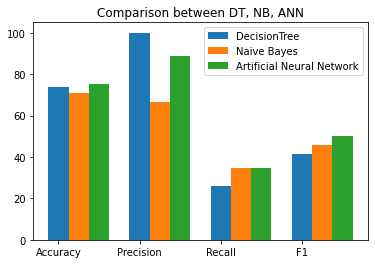

In [68]:
import numpy as np
import matplotlib.pyplot as plt
X = ['Accuracy','Precision','Recall','F1']
DT = [73.84, 100, 26.08, 41.37]
NB = [70.76, 66.66, 34.78, 45.71]
ANN = [75.38, 88.88, 34.78, 50]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.00, DT, width = 0.25, label = 'DecisionTree')
plt.bar(X_axis + 0.25, NB, width = 0.25, label = 'Naive Bayes')
plt.bar(X_axis + 0.50, ANN, width = 0.25, label = 'Artificial Neural Network')
  
plt.xticks(X_axis, X)
plt.title("Comparison between DT, NB, ANN")
plt.legend()
plt.show()